In [1]:
from rdkit.Chem import PandasTools

,InitialSmiles,minimizedAffinity,CNNscore,CNNaffinity,CNN_VS,CNNaffinity_variance,GBInteractionEnergy,target_path,complex_path,optimized_energy,STERM_INTERACTION,STERM_BASELINE_ENERGY,STERM_BOUND_ENERGY,STERM_HTRANSFER_ENERGY,ID,Mol
0,OC1=C(C=C(Cl)C=C1)C(=O)NC1=C(Cl)C=C(C=C1)[N+](...,-7.4555400000000001,0.76322638990000002,5.5779023170000004,4.2572021484000002,0.088734239300000003,-29.589811656944608,tmp/qmmm_0_niclosamide_pocopted.pdb,tmp/gbmin_1_niclosamide_target.pdb,-2026.5,-21.207000000000001,-255.27000000000001,-156.71000000000001,101.48,niclosamide,
1,C[C@H](C1=CNC=N1)C1=C(C)C(C)=CC=C1,-4.8551099999999998,0.70728248360000001,5.0571932792999998,3.5768642426000001,0.3730905652,-21.833693320163121,tmp/qmmm_1_dexmedetomidine_pocopted.pdb,tmp/gbmin_7_dexmedetomidine_target.pdb,-1719.3,-30.513999999999999,35.667400000000001,123.185,101.48,dexmedetomidine,
2,COC1=C(OCC(O)CO)C=CC=C1,-5.20444,0.83395338060000002,4.0718803405999999,3.3957583904000002,0.37914997340000001,-15.46125977262712,tmp/qmmm_2_guaifenesin_pocopted.pdb,tmp/gbmin_8_guaifenesin_target.pdb,-2004.5999999999999,-3.8778000000000001,-157.12,-147.31999999999999,-0,guaifenesin,

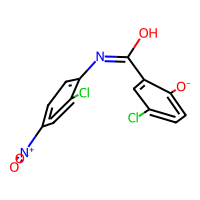
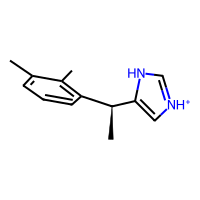
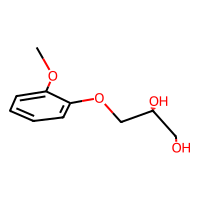

In [3]:
PandasTools.LoadSDF("/home/arazthexd/projects/002_sqm/output/hscored_ligands.sdf", molColName="Mol")

In [4]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 700, 500
IPythonConsole.drawOptions.addAtomIndices = True

mol = Chem.MolFromSmiles("CCC(O[H])CCNCCC")

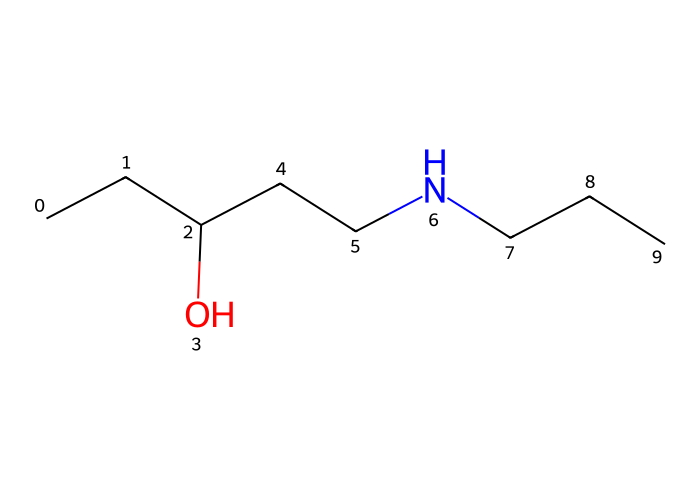

In [33]:
mol

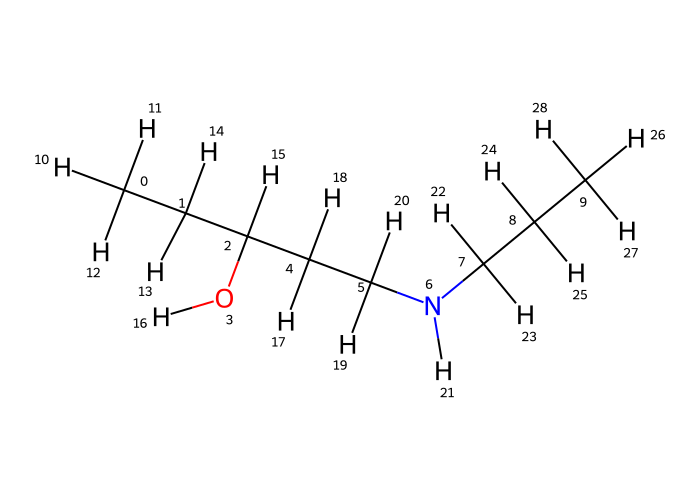

In [24]:
Chem.AddHs(mol)

In [41]:
Chem.RemoveHs(mol).GetAtomWithIdx(3).GetNumImplicitHs()

0

In [38]:
mol.GetAtomWithIdx(3).GetNumExplicitHs()

1

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = 700, 500
IPythonConsole.drawOptions.addAtomIndices = True

mol = Chem.MolFromSmiles("CCC(O[H])CCNCCC")

In [2]:
from prepare import prepare_ligands

[<rdkit.Chem.rdchem.Mol object at 0x7f5251220d60>, <rdkit.Chem.rdchem.Mol object at 0x7f5251220c70>]
[<rdkit.Chem.rdchem.Mol object at 0x7f5251220d60>, <rdkit.Chem.rdchem.Mol object at 0x7f5251220c70>]


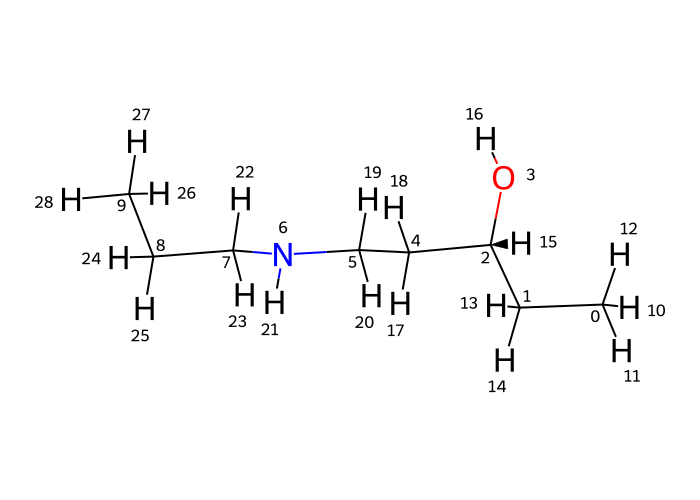

In [5]:
prepare_ligands([mol])[1]

In [1]:
import os
from os import path

from prepare import prepare_ligands, load_ligands, prepare_protein, write_ligands
from dock import perform_docking, select_docked
from config import *

protein_path = INPUT_PROTEIN

current_ratio = 1

# Prepare...
if LIGANDS_PREPARATION_PERFORM:
    ligands = load_ligands(INPUT_LIGANDS, final_3d=False, addHs=False)
    orig_lig_n = len(ligands)
    ligands = prepare_ligands(ligands)
else:
    ligands = load_ligands(INPUT_LIGANDS, final_3d=True, addHs=True)
    orig_lig_n = len(ligands)

if PRE_DOCKING_LIGANDS_PREFIX:
    predock_path = path.join(OUT_DIR, f"{PRE_DOCKING_LIGANDS_PREFIX}_ligands.sdf")
    _ = write_ligands(ligands, predock_path)

if PROTEIN_PREPARATION_PERFORM:
    protein_path = prepare_protein(INPUT_PROTEIN)

# VS...
if DOCKING_PERFORM:
    results: dict = perform_docking(ligands, protein_path)
    ligands = results["docked_ligands"]
    if "flex_coords" in results.keys():
        raise NotImplementedError()
    
    current_ratio = current_ratio * DOCKING_SELECT_RATIO
    select_max = current_ratio * orig_lig_n * DOCKING_SELECT_MAX_PER_LIG + 1
    ligands = select_docked(ligands, select_max)

if POST_DOCK_LIGANDS_PREFIX:
    postdock_path = path.join(OUT_DIR, f"{POST_DOCK_LIGANDS_PREFIX}_ligands.sdf")
    _ = write_ligands(ligands, postdock_path)

100%|██████████| 1/1 [00:00<00:00, 1844.46it/s]


[<rdkit.Chem.rdchem.Mol object at 0x7f29b3df0820>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3df0890>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3df0900>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3df0970>]
[<rdkit.Chem.rdchem.Mol object at 0x7f2a05606f70>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dee020>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dee070>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dee160>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dedfd0>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dee1b0>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dee250>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dee0c0>]
[<rdkit.Chem.rdchem.Mol object at 0x7f29cf645c60>, <rdkit.Chem.rdchem.Mol object at 0x7f29b47e0a40>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dede90>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dedda0>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dee340>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dedd50>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dedcb0>, <rdkit.Chem.rdchem.Mol object at 0x7f29b3dee3e0

  0%|          | 0/2 [00:00<?, ?it/s]

              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina v1.1 master:e4cb380+   Built Dec 18 2023.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Commandline: /home/arazthexd/tools/gnina/gnina -l ./tmp/ligs_to_dock_batch0.sdf -r ./output/prepared_protein.pdb --center_x 1.16 --center_y -0.56 --center_z -2.91 --size_x 20 --size_y 20 --size_z 20 -o ./tmp/docked_ligs_batch0.sdf --exhaustiveness 10 --num_modes 5 --cpu 8
Using random seed: -1652723448

0%   10   20   30   40   50   60   70   80   90   100%
|----|----|----|----|----|----|----|----|----|----|
***************************************************

mode |  affinity  |  intramol  |    CNN     |   CNN
     | (kcal/mol) | (kcal/mol) | pose score | affinity
-----+------------+------------+------------+----------
    1       -6.24   

 50%|█████     | 1/2 [01:23<01:23, 83.23s/it]

famotidine | pose 4 | ligand outside box

mode |  affinity  |  intramol  |    CNN     |   CNN
     | (kcal/mol) | (kcal/mol) | pose score | affinity
-----+------------+------------+------------+----------
    1       -6.31        0.32       0.4777      5.191
    2       -6.32        0.46       0.2982      4.890
    3       -7.07        1.57       0.1799      4.704
    4       -6.02        2.56       0.1778      4.753
    5       -7.26        0.74       0.1430      4.493
              _             
             (_)            
   __ _ _ __  _ _ __   __ _ 
  / _` | '_ \| | '_ \ / _` |
 | (_| | | | | | | | | (_| |
  \__, |_| |_|_|_| |_|\__,_|
   __/ |                    
  |___/                     

gnina v1.1 master:e4cb380+   Built Dec 18 2023.
gnina is based on smina and AutoDock Vina.
Please cite appropriately.

Commandline: /home/arazthexd/tools/gnina/gnina -l ./tmp/ligs_to_dock_batch1.sdf -r ./output/prepared_protein.pdb --center_x 1.16 --center_y -0.56 --center_z -2.91 --size_x 2

100%|██████████| 2/2 [02:12<00:00, 66.36s/it]


mode |  affinity  |  intramol  |    CNN     |   CNN
     | (kcal/mol) | (kcal/mol) | pose score | affinity
-----+------------+------------+------------+----------
    1       -6.00       -0.37       0.4556      5.013
    2       -6.61       -0.68       0.4495      5.098
    3       -7.43       -0.54       0.4441      5.243
    4       -7.34       -0.49       0.3896      5.230
    5       -5.61       -0.62       0.2032      4.665


In [1]:
from src.interfaces.gnina import GninaInterface
from src.utils.pockets import PocketLocation
gnina = GninaInterface()

In [3]:
gnina.__dict__

{'bin_path': '/home/arazthexd/tools/gnina/gnina',
 'work_dir': '/home/arazthexd/projects/002_sqm/tmp',
 'job_name': 'job',
 'exhaustiveness': 8,
 'num_modes': 9,
 'cpu': 1,
 'other_params': []}

In [2]:
pocloc = PocketLocation(
        "boxcxyz", 
        center=(1.16, -0.56,- 2.91), 
        xyz_size=(20, 20, 20)
    )
gnina.run("/home/arazthexd/projects/002_sqm/output/predock_ligands.sdf",
          "output/prepared_protein.pdb",
          "test_out.sdf",
          pocloc,
          return_mols=True)

KeyboardInterrupt: 

In [3]:
from src.interfaces.durrantlab import DimorphiteProtoEnumerator
from rdkit import Chem
from rdkit.Chem import rdDistGeom

mol = Chem.MolFromSmiles("CCCCOCCC(O)=O")
mol = Chem.AddHs(mol)
rdDistGeom.EmbedMolecule(mol)
pe = DimorphiteProtoEnumerator()
pe.enumerate(mol)


usage: ipykernel_launcher.py [-h] [--min_ph MIN] [--max_ph MAX]
                             [--pka_precision PRE] [--smiles SMI]
                             [--smiles_file FILE] [--output_file FILE]
                             [--max_variants MXV] [--label_states] [--silent]
                             [--test]

Dimorphite 1.2.4: Creates models of appropriately protonated small moleucles.
Apache 2.0 License. Copyright 2020 Jacob D. Durrant.

options:
  -h, --help           show this help message and exit
  --min_ph MIN         minimum pH to consider (default: 6.4)
  --max_ph MAX         maximum pH to consider (default: 8.4)
  --pka_precision PRE  pKa precision factor (number of standard devations,
                       default: 1.0)
  --smiles SMI         SMILES string to protonate
  --smiles_file FILE   file that contains SMILES strings to protonate
  --output_file FILE   output file to write protonated SMILES (optional)
  --max_variants MXV   limit number of variants per input 

/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":


Exception: ERROR: unrecognized arguments: --f=/home/arazthexd/.local/share/jupyter/runtime/kernel-v2-758auTDtel7pbdq.json



In [16]:
from rdkit import Chem
mol = Chem.MolFromSmiles("CCC1=C2CN3C(=CC4=C(COC(=O)[C@]4(O)CC)C3=O)C2=NC2=CC=C(OC(=O)N3CCC(CC3)N3CCCCC3)C=C12")

In [5]:
from rdkit.Chem import rdmolops
rdmolops.FindRingFamilies(mol)
rinfo = mol.GetRingInfo()

In [8]:
rinfo.AtomRings()

((2, 42, 22, 21, 20, 3),
 (4, 3, 20, 6, 5),
 (7, 8, 9, 18, 5, 6),
 (10, 11, 12, 14, 8, 9),
 (23, 24, 25, 41, 42, 22),
 (30, 31, 32, 33, 34, 29),
 (36, 37, 38, 39, 40, 35))

In [9]:
rinfo.AtomRingFamilies()

((35, 36, 37, 38, 39, 40),
 (29, 30, 31, 32, 33, 34),
 (3, 4, 5, 6, 20),
 (5, 6, 7, 8, 9, 18),
 (8, 9, 10, 11, 12, 14),
 (2, 3, 20, 21, 22, 42),
 (22, 23, 24, 25, 41, 42))

In [24]:
rinfo.AreRingsFused(0, 0)

False

In [1]:
from src.utils.iotools import save_pl_complex
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

mol = next(Chem.SDMolSupplier("/home/arazthexd/projects/002_sqm/tmp/docked_ligs_batch2.sdf"))

save_pl_complex(mol, "data/targets/kguD.pdb", "test.pdb")

[13:23:49] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


In [2]:
import requests

response = requests.post("https://proteins.plus/api/pdb_files_rest", 
                         files={"pdb_file[pathvar]": open("test.pdb", "rb")})

In [ ]:
dd = requests.get(response.json()["location"])

In [ ]:
dd.json()

{'message': 'PDB file is loaded',
 'id': 'testpdb8d44bc7e-6dbf-45a3-ae1c-366254eb082f'}

In [92]:
response.json()["location"]

'https://proteins.plus/api/pdb_files_rest/testpdb8d44bc7e-6dbf-45a3-ae1c-366254eb082f'

In [4]:
import json
rr = requests.post("https://proteins.plus/api/protoss_rest", headers={"Accept": "application/json"},
                   json={"protoss": {"pdbCode": dd.json()["id"]}})

In [5]:
print(rr.text)

{"status_code":202,"location":"https://proteins.plus/api/protoss_rest/RbMSWKbje4irtydNCAMdq2F8","message":"The job will be created in the specified location"}


In [8]:
import wget

rrr = wget.download(requests.get(rr.json()["location"]).json()["ligands"])

In [10]:
from rdkit import Chem

s = Chem.SDMolSupplier("/home/arazthexd/projects/002_sqm/testpdb67ec4798-07d7-41f7-b8b1-e8b7f12b7bd9.sdf")

In [11]:
mols = list(s)

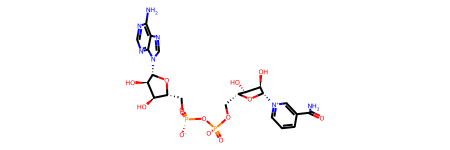

In [14]:
from rdkit.Chem.Draw import IPythonConsole

mols[0]

In [103]:
from __future__ import annotations

import os, pathlib
from typing import List, Tuple, Any

from rdkit import Chem
from rdkit.Chem import Conformer
from rdkit.Geometry import Point3D

from openmm import System, Context, VerletIntegrator, Vec3, unit, LocalEnergyMinimizer, State
from openmm.app import ForceField, PDBFile, Modeller, Topology
from openmmforcefields.generators import SMIRNOFFTemplateGenerator
from openff.toolkit import Molecule
from openff.units import unit as offunit
import parmed
from espaloma_charge.openff_wrapper import EspalomaChargeToolkitWrapper

# from ..abstract import ComplexOptimizer

class OpenMMComponent:
    def __init__(self, topology, system, positions, forcefield, 
                 name="component", work_dir=".", structure=None, original_intype=None, **kwargs):
        self.topology: Topology = topology
        self.system: System = system
        self.positions = positions
        self.forcefield: ForceField = forcefield
        self.structure: parmed.Structure = structure
        self.orig_intype: str = original_intype
        self.name = name
        self.work_dir = str(pathlib.Path(work_dir).absolute())
        self.others = kwargs
    
    @classmethod
    def create_component(cls, cinput: str | Chem.Mol, forcefield: ForceField, *args, **kwargs):
        if isinstance(cinput, str):
            if cinput.endswith(".pdb"):
                return cls.create_component_from_pdb(cinput, forcefield, *args, **kwargs)
            else:
                raise NotImplementedError()
        elif isinstance(cinput, Chem.Mol):
            return cls.create_component_from_rdmol(cinput, forcefield, *args, **kwargs)
        else:
            raise NotImplementedError()

    @classmethod
    def create_component_from_pdb(cls, pdb_path: str, forcefield: ForceField, *args, **kwargs):

        pdb = PDBFile(pdb_path)
        system = forcefield.createSystem(pdb.topology, *args, **kwargs)

        struct: parmed.Structure = parmed.openmm.load_topology(
            topology=pdb.topology, system=system, xyz=pdb.positions
        )
        return cls(pdb.topology, system, pdb.positions, forcefield, struct, "pdb")

    @classmethod
    def create_component_from_rdmol(cls, rdmol: Chem.Mol, forcefield: ForceField, cache_path: str = None, *args, **kwargs):

        offmol = Molecule.from_rdkit(rdmol, hydrogens_are_explicit=True, allow_undefined_stereo=True)
        offmol.assign_partial_charges('espaloma-am1bcc', toolkit_registry=EspalomaChargeToolkitWrapper(), use_conformers=True)
        topology = offmol.to_topology().to_openmm()
        # positions = [Vec3(x, y, z) * unit.angstrom for x, y, z in offmol.conformers[0].m_as(offunit.angstrom)]
        positions = offmol.conformers[0].m_as(offunit.angstrom)

        smirnoff = SMIRNOFFTemplateGenerator(molecules=offmol, cache=cache_path)
        forcefield.registerTemplateGenerator(smirnoff.generator)
        system = forcefield.createSystem(topology, *args, **kwargs)

        struct: parmed.Structure = parmed.openmm.load_topology(
            topology=topology, system=system, xyz=positions
        )

        return cls(topology, system, positions, forcefield, struct, "rdmol", orig_rdmol=rdmol)
    
    @classmethod
    def merge_components(cls, components: List[OpenMMComponent], forcefield: ForceField, *args, **kwargs):
        
        modeller = Modeller(components[0].topology, components[0].positions)
        for c in components[1:]:
            modeller.add(c.topology, c.positions)
        system = forcefield.createSystem(modeller.topology, *args, **kwargs)
        
        struct: parmed.Structure = parmed.openmm.load_topology(
            topology=modeller.topology, system=system, xyz=modeller.positions
        )
        return cls(modeller.topology, system, modeller.positions, forcefield, struct, "merged")
    
    def convert_to_orig_format(self):
        if self.orig_intype == "pdb":
            return self.to_pdb()
        elif self.orig_intype == "rdmol":
            return self.to_rdkit()
        else:
            raise NotImplementedError()

    def to_pdb(self, path=None):
        if path is None:
            path = os.path.join(self.work_dir, f"{self.name}.pdb")
        PDBFile.writeFile(self.topology, self.positions, path)
        return path

    def to_rdkit(self):
        new_mol = Chem.Mol(self.others["orig_rdmol"])
        conformer = new_mol.GetConformer()
        for i in range(new_mol.GetNumAtoms()):
            conformer.SetAtomPosition(i, Point3D(*self.positions[i].value_in_unit(unit.angstrom)))
        return new_mol
        

class OpenMMGeneralOptimizer:
    def __init__(self, forcefields: List[str] | ForceField, work_dir: str):
        self.work_dir: str = work_dir
        if isinstance(forcefields, list):
            self.forcefield: ForceField = ForceField(*forcefields)
        else:
            self.forcefield: ForceField = forcefields

    def _optimize(self, components: List[OpenMMComponent], return_components: bool = True, *args, **kwargs
                 ) -> Tuple[OpenMMComponent | str, List[Any]]:
        
        components: List[OpenMMComponent] = []
        for cinput in groups:
            components.append(OpenMMComponent.create_component(cinput, self.forcefield, *args, **kwargs))
        
        merged = OpenMMComponent.merge_components(components, self.forcefield, *args, **kwargs)
        
        integrator = VerletIntegrator(0.002)
        context = Context(merged.system, integrator)
        context.setPositions(merged.positions)
        LocalEnergyMinimizer.minimize(context)

        minimized_state: State = context.getState(getPositions=True)
        minimized_positions = minimized_state.getPositions(asNumpy=True)
        merged.positions = minimized_positions

        start_index = 0
        for component in components:
            n_particles = component.topology.getNumAtoms()
            component.positions = minimized_positions[start_index:start_index+n_particles]
            start_index += n_particles
        
        if return_components:
            return merged, components
        
        out = merged.to_pdb(), [component.convert_to_orig_format() for component in components]
        return out

class OpenMMComplexOptimizer(OpenMMGeneralOptimizer):
    def __init__(self, forcefields: List[str] | ForceField, work_dir: str = "."):
        super().__init__(forcefields, work_dir)
    
    def optimize(self, ligand: Chem.Mol, target: str, *args, **kwargs) -> Tuple[Chem.Mol, str]:
        with open(target, "r") as f:
            target_lines = f.readlines()
        atom_lines = []
        het_lines = []
        for line in target_lines:
            if "HETATM" in line:
                het_lines.append(line)
            if "ATOM" in line:
                atom_lines.append(line)
        
        atom_c_path = os.path.join(self.work_dir, "atom_c_tmp.pdb")
        het_c_rdmol = Chem.MolFromPDBBlock("".join(het_lines), removeHs=False)
        print(het_lines)
        return het_c_rdmol
        # return super()._optimize(ligand, target, *args, **kwargs)

In [101]:
from rdkit.Chem import rdDistGeom
from rdkit.Chem.Draw import IPythonConsole

mol = Chem.MolFromSmiles("CCCCC.CC")
mol = Chem.AddHs(mol)
rdDistGeom.EmbedMolecule(mol)
ff = ForceField()
optimizer = OpenMMComplexOptimizer(ff, ".")

['HETATM 1482  N1  UNL   121       1.668   0.451   1.683  1.00  0.00           N  \n', 'HETATM 1483  C1  UNL   121       2.259   0.631   0.537  1.00  0.00           C  \n', 'HETATM 1484  N2  UNL   121       3.254   1.578   0.410  1.00  0.00           N  \n', 'HETATM 1485  N3  UNL   121       1.989  -0.199  -0.516  1.00  0.00           N  \n', 'HETATM 1486  C2  UNL   121       0.802  -0.258  -1.066  1.00  0.00           C  \n', 'HETATM 1487  N4  UNL   121      -0.289   0.527  -0.745  1.00  0.00           N  \n', 'HETATM 1488  C3  UNL   121      -1.416   0.298  -1.506  1.00  0.00           C  \n', 'HETATM 1489  C4  UNL   121      -2.675   1.105  -1.307  1.00  0.00           C  \n', 'HETATM 1490  S1  UNL   121      -3.957   0.724  -2.538  1.00  0.00           S  \n', 'HETATM 1491  C5  UNL   121      -5.190   1.997  -2.196  1.00  0.00           C  \n', 'HETATM 1492  C6  UNL   121      -6.450   1.795  -3.084  1.00  0.00           C  \n', 'HETATM 1493  C7  UNL   121      -7.174   0.494  -2.7

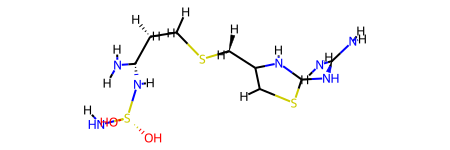

In [102]:
optimizer.optimize(mol, "/home/arazthexd/projects/002_sqm/tmp/cuby_0_famotidine_complex.pdb")

In [94]:
IPythonConsole.drawMol3D(optimizer.optimize(mol, "/home/arazthexd/projects/002_sqm/tmp/cuby_0_famotidine_complex.pdb"))

['HETATM 1482  N1  UNL   121       1.668   0.451   1.683  1.00  0.00           N  \n', 'HETATM 1483  C1  UNL   121       2.259   0.631   0.537  1.00  0.00           C  \n', 'HETATM 1484  N2  UNL   121       3.254   1.578   0.410  1.00  0.00           N  \n', 'HETATM 1485  N3  UNL   121       1.989  -0.199  -0.516  1.00  0.00           N  \n', 'HETATM 1486  C2  UNL   121       0.802  -0.258  -1.066  1.00  0.00           C  \n', 'HETATM 1487  N4  UNL   121      -0.289   0.527  -0.745  1.00  0.00           N  \n', 'HETATM 1488  C3  UNL   121      -1.416   0.298  -1.506  1.00  0.00           C  \n', 'HETATM 1489  C4  UNL   121      -2.675   1.105  -1.307  1.00  0.00           C  \n', 'HETATM 1490  S1  UNL   121      -3.957   0.724  -2.538  1.00  0.00           S  \n', 'HETATM 1491  C5  UNL   121      -5.190   1.997  -2.196  1.00  0.00           C  \n', 'HETATM 1492  C6  UNL   121      -6.450   1.795  -3.084  1.00  0.00           C  \n', 'HETATM 1493  C7  UNL   121      -7.174   0.494  -2.7

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [1]:
from src.interfaces.openmm import OpenMMComplexOptimizer, OpenMMComplexInteractScorer
from src.config import MM_BASE_FORCEFIELDS
from rdkit import Chem
optimizer = OpenMMComplexOptimizer(MM_BASE_FORCEFIELDS)
mol = next(Chem.SDMolSupplier("test.sdf", removeHs=False))
target = "output/prepared_protein.pdb"
d = optimizer.optimize(mol, target)
scorer = OpenMMComplexInteractScorer(MM_BASE_FORCEFIELDS)
scorer.score(*d)

/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/espaloma_charge/openff_wrapper.py:112: IncorrectNumConformersWarning: Molecule 'Molecule with name '' and SMILES '[H][C]1=[C]([C]([H])([H])[S][C]([H])([H])[C]([H])([H])[C]([N]([H])[S](=[O])(=[O])[N]([H])[H])=[N+]([H])[H])[N]([H])[C](=[N][C]([N]([H])[H])=[N+]([H])[H])[S]1'' has 1 conformers, but charge method 'espaloma-am1bcc' expects exactly 0.
  self._check_n_conformers(
/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


1734920.8914645542 1748282.3965316976 -13361.963304917168


0.45823777381156106

In [3]:
d[1]

'/home/arazthexd/projects/002_sqm/ommcopt_job_prot.pdb'

In [76]:
from rdkit.Chem import rdDistGeom
from rdkit.Chem.Draw import IPythonConsole

mol = Chem.MolFromSmiles("CCCCC.CC")
mol = Chem.AddHs(mol)
rdDistGeom.EmbedMolecule(mol)
ff = ForceField()
c = OpenMMComponent.create_component_from_rdmol(mol, ff)
optimizer = OpenMMOptimizer(ff, ".")
mergedc, eachc = optimizer.optimize([mol])

/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/espaloma_charge/openff_wrapper.py:112: IncorrectNumConformersWarning: Molecule 'Molecule with name '' and SMILES '[H][C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H].[H][C]([H])([H])[C]([H])([H])[H]'' has 1 conformers, but charge method 'espaloma-am1bcc' expects exactly 0.
  self._check_n_conformers(
/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [77]:
IPythonConsole.drawMol3D(eachc[0].to_rdkit())
IPythonConsole.drawMol3D(eachc[0].others["orig_rdmol"])

[ 0.18366723 -0.15071446 -0.16691843] nm
[ 0.13070585 -0.11484895 -0.02699682] nm
[-0.00362317 -0.03807733 -0.03211552] nm
[-0.11926578 -0.11428432 -0.10127573] nm
[-0.15148512 -0.24806988 -0.03250131] nm
[0.05690746 0.30226469 0.14892496] nm
[-0.09462392  0.29442114  0.16973321] nm
[ 0.19177534 -0.06130749 -0.22885156] nm
[ 0.11787183 -0.22212049 -0.21645044] nm
[ 0.28252932 -0.19604996 -0.15899858] nm
[ 0.20459048 -0.05257561  0.02373753] nm
[ 0.120253   -0.20548318  0.03277186] nm
[ 0.01165576  0.05679845 -0.0838339 ] nm
[-0.03357438 -0.01315487  0.06980357] nm
[-0.09573843 -0.13163747 -0.2063511 ] nm
[-0.20843303 -0.05140601 -0.09943927] nm
[-0.17165934 -0.2327453   0.07358206] nm
[-0.23969249 -0.29321185 -0.07803916] nm
[-0.06870988 -0.31821203 -0.04291898] nm
[0.08874112 0.40633538 0.1420154 ] nm
[0.08533337 0.25115788 0.05692915] nm
[0.10906895 0.25533801 0.23240137] nm
[-0.12657078  0.19049011  0.17764139] nm
[-0.12293392  0.34646323  0.26129168] nm
[-0.14678943  0.34063047  0.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [18]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from src.utils.moltools import sync_mol_flexible_rotors

mol = Chem.MolFromSmiles("CCOCCc1cnccc1")
ref = Chem.MolFromSmiles("CCOCCc1c[nH+]ccc1")
mol = Chem.AddHs(mol)
ref = Chem.AddHs(ref)
AllChem.EmbedMolecule(mol)
AllChem.EmbedMolecule(ref)

0

In [19]:
IPythonConsole.drawMol3D(mol)
IPythonConsole.drawMol3D(ref)
sync_mol_flexible_rotors(mol, ref)
IPythonConsole.drawMol3D(mol)
IPythonConsole.drawMol3D(ref)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [7]:
from rdkit.Chem import rdDistGeom
from rdkit.Chem.Draw import IPythonConsole
from src.interfaces.openmm import OpenMMComplexOptimizer, OpenMMComplexInteractScorer, OpenMMComponent
from src.config import MM_BASE_FORCEFIELDS
from rdkit import Chem
from openmm.app import ForceField

mol = Chem.MolFromSmiles("CCCCC.CC")
mol = Chem.AddHs(mol)
rdDistGeom.EmbedMolecule(mol)
ff = ForceField()
cmol = OpenMMComponent.create_component_from_rdmol(mol, ff)

from interfaces.cuby4c import Cuby4EnergyConfig, Cuby4QMMMConfig, Cuby4MOPACFullConfig, Cuby4AmberConfig, Cuby4MOPACMolSpecConfig
from rdkit import Chem
cx = Cuby4MOPACMolSpecConfig.from_pdb("output/prepared_protein.pdb")
c = Cuby4QMMMConfig(":UNL", Cuby4MOPACFullConfig(molspec=cx), Cuby4AmberConfig(topology_file=cmol.to_amber_prmtop()))
c2 = Cuby4EnergyConfig("test.pdb")
print(c2.get_config_str())
print(c.get_qmmm_str(Chem.MolFromSmiles("CCOCCc1cnccc1")))

/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/espaloma_charge/openff_wrapper.py:112: IncorrectNumConformersWarning: Molecule 'Molecule with name '' and SMILES '[H][C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H].[H][C]([H])([H])[C]([H])([H])[H]'' has 1 conformers, but charge method 'espaloma-am1bcc' expects exactly 0.
  self._check_n_conformers(
/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(



geometry: test.pdb
cuby_threads: 1
job: energy

interface: qmmm
qmmm_core: :UNL
qmmm_embedding: mechanical
gradient_on_point_charges: no
calculation_qm:
  gradient_on_point_charges: no
  
  interface: mopac
  method: pm6
  mopac_exe: /home/arazthexd/tools/mopac/bin/mopac
  mopac_mozyme: yes
  mopac_corrections: d3h4x
  solvent_model: none
  mopac_setcharge:
    1: 1
    2: 0
    3: 0
    4: 0
    5: 0
    6: 0
    7: 0
    8: 0
    9: 0
    10: 0
    11: 0
    12: 0
    13: 0
    14: 0
    15: 0
    16: 0
    17: 0
    18: 0
    19: 0
    20: 0
    21: 0
    22: 0
    23: 0
    24: 0
    25: 0
    26: 0
    27: 0
    28: 0
    29: 0
    30: 0
    31: 0
    32: 0
    33: 0
    34: 0
    35: 0
    36: 0
    37: 0
    38: 1
    39: 0
    40: 0
    41: 0
    42: 0
    43: 0
    44: 0
    45: 0
    46: 0
    47: 0
    48: 0
    49: 0
    50: 0
    51: 0
    52: 0
    53: 0
    54: 0
    55: 0
    56: 0
    57: 0
    58: 0
    59: 0
    60: 1
    61: 0
    62: 0
    63: 0
    64: 0
    65: 

In [6]:
import shutil, pathlib
str(pathlib.Path(shutil.which("sander")).parent.parent.absolute())

'/home/arazthexd/miniforge3/envs/sqmvscreen2'

In [54]:
help(LocalEnergyMinimizer())

AttributeError: No constructor defined

In [49]:
from rdkit.Chem import rdDistGeom
mol = Chem.MolFromSmiles("CCCCC")
mol = Chem.AddHs(mol)
rdDistGeom.EmbedMolecule(mol)
ff = ForceField()
c = OpenMMComponent.create_component_from_rdmol(mol, ff)
OpenMMComponent.merge_components([c], ff)

/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/espaloma_charge/openff_wrapper.py:112: IncorrectNumConformersWarning: Molecule 'Molecule with name '' and SMILES '[H][C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[C]([H])([H])[H]'' has 1 conformers, but charge method 'espaloma-am1bcc' expects exactly 0.
  self._check_n_conformers(
/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/dgl/heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


In [1]:
import warnings
warnings.simplefilter("ignore")

from rdkit import Chem
from rdkit.Chem import rdDistGeom

from openmm.app import ForceField

from src.interfaces.cuby4 import Cuby4LigandEnergyScorer, Cuby4Interface, Cuby4ComplexEnergyScorer, Cuby4ComplexOptimizer
from src.interfaces.cuby4c import Cuby4MOPACFullConfig, Cuby4AmberConfig, Cuby4QMMMConfig
from src.utils.pockets import isolate_pocket, PocketLocation

mopac_config = Cuby4MOPACFullConfig()
amber_config = Cuby4AmberConfig(forcefield=ForceField("amber14-all.xml"))
qmmm_config = Cuby4QMMMConfig(mopac_config, amber_config)
interface = Cuby4Interface(qmmm_config)
scorer = Cuby4ComplexOptimizer(interface)

target = "output/prepared_protein.pdb"
mol = next(Chem.SDMolSupplier("output/docked_ligands.sdf"))
# mol = Chem.MolFromSmiles("COCCC(=O)CCn1cncc1")
mol = Chem.AddHs(mol, addCoords=True)
# rdDistGeom.EmbedMolecule(mol)

isolate_pocket(target, PocketLocation("ligand", ligand=mol), "test.pdb")
scorer.optimize(mol, "test.pdb")

[12:39:44] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


(-2423.2, PosixPath('/home/arazthexd/projects/002_sqm/None_restart.pdb'))

In [9]:
x = [1, 2, 3]
x[-1::-1]

[3, 2, 1]

In [7]:
mol = next(Chem.SDMolSupplier("output/docked_ligands.sdf"))
# mol = Chem.MolFromSmiles("COCCC(=O)CCn1cncc1")
mol = Chem.AddHs(mol, addCoords=True)
print(Chem.MolToPDBBlock(mol))

HETATM    1  C1  UNL     1      -4.083   1.765  -2.328  1.00  0.00           C  
HETATM    2  C2  UNL     1      -4.684   2.384  -3.447  1.00  0.00           C  
HETATM    3  I1  UNL     1      -3.745   3.851  -4.659  1.00  0.00           I  
HETATM    4  C3  UNL     1      -6.021   2.141  -3.790  1.00  0.00           C  
HETATM    5  C4  UNL     1      -6.803   1.287  -3.017  1.00  0.00           C  
HETATM    6  I2  UNL     1      -8.793   0.979  -3.629  1.00  0.00           I  
HETATM    7  C5  UNL     1      -6.280   0.679  -1.868  1.00  0.00           C  
HETATM    8  N1  UNL     1      -7.131  -0.055  -0.999  1.00  0.00           N  
HETATM    9  C6  UNL     1      -4.944   0.994  -1.496  1.00  0.00           C  
HETATM   10  I3  UNL     1      -4.334   0.349   0.478  1.00  0.00           I  
HETATM   11  C7  UNL     1      -2.587   1.875  -2.054  1.00  0.00           C  
HETATM   12  C8  UNL     1      -1.705   0.631  -2.323  1.00  0.00           C  
HETATM   13  C9  UNL     1  

[09:02:07] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.


In [1]:
from itertools import product
from typing import List, Tuple

from rdkit import Chem
from rdkit.Chem import (
    rdDistGeom, rdForceFieldHelpers, rdmolops, AllChem, rdMolAlign
)
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.Chem.EnumerateStereoisomers import (
    EnumerateStereoisomers, StereoEnumerationOptions, 
)
from rdkit.Chem.MolStandardize import rdMolStandardize
from rdkit.ML.Cluster import Butina

class RDKitRingEnumerator():
    def __init__(self, num_confs: int = 30, minimize: bool = False,
                 max_per_ring: int = 2, dist_threshold: float = 0.5):
        super().__init__() # debug should go here
        self.num_confs: int = num_confs
        self.minimize: bool = minimize
        self.max_per_ring: int = max_per_ring
        self.dist_threshold: float = dist_threshold

    def enumerate(self, ligand: Chem.Mol) -> List[Chem.Mol]:
        ligand_ref = Chem.Mol(ligand)
        ligand = Chem.Mol(ligand)
        rdDistGeom.EmbedMultipleConfs(ligand, numConfs=self.num_confs, clearConfs=False)
        if self.minimize:
            ligand = Chem.AddHs(ligand, addCoords=True)
            rdForceFieldHelpers.MMFFOptimizeMoleculeConfs(ligand)

        rdmolops.FindRingFamilies(ligand)
        rinfo = ligand.GetRingInfo()
        if rinfo.NumRings() == 0:
            return [Chem.Mol(ligand, confId=0)]
        
        clusts_per_ring = []
        for i, ring_atoms in enumerate(rinfo.AtomRings()):
            if all(ligand.GetAtomWithIdx(a).GetIsAromatic() for a in ring_atoms):
                continue
            dists = AllChem.GetConformerRMSMatrix(ligand, prealigned=False, atomIds=ring_atoms)
            clusts = Butina.ClusterData(dists, ligand.GetNumConformers(), self.dist_threshold, 
                                        isDistData=True, reordering=True)
            clusts = [set(clust) for clust in clusts]
            clusts_per_ring.append(clusts[:self.max_per_ring])
        
        # print(clusts_per_ring)
        rings_combos = list(product(*clusts_per_ring))
        final_mols = []
        # print(rings_combos)
        for combo in rings_combos:
            if len(combo) == 0: 
                continue
            common: set = combo[0]
            for s in combo[1:]:
                common.intersection_update(s)
            # print(common)
            if common:
                final_mols.append(Chem.Mol(ligand, confId=common.pop()))
        
        # if ligand_ref.GetNumConformers() > 0:
        #     if ligand_ref.GetConformer().Is3D():
        #         [rdMolAlign.AlignMol(m, ligand_ref) for m in final_mols]
        
        if final_mols:
            return final_mols
        else:
            return [Chem.Mol(ligand, confId=0)]

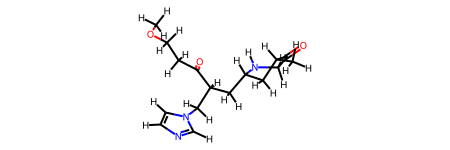

In [25]:
# mol = list(Chem.SDMolSupplier("output/docked_ligands.sdf"))[10]
mol = Chem.MolFromSmiles("COCCC(=O)[C@H](CC1NCC(=O)C(C)C1)Cn1cncc1")
mol = Chem.AddHs(mol, addCoords=True)
AllChem.EmbedMolecule(mol)
mol

In [26]:
a = RDKitRingEnumerator(minimize=True).enumerate(mol)
a

In [27]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawMol3D(a[0])
IPythonConsole.drawMol3D(a[1])

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [1]:
from src.pipeline import DefaultLigPrepPipe
pipe = DefaultLigPrepPipe()

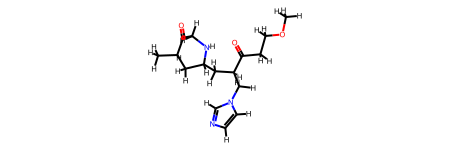

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
mol = Chem.MolFromSmiles("COCCC(=O)[C@H](CC1NCC(=O)C(C)C1)Cn1cncc1")
mol = Chem.AddHs(mol, addCoords=True)
AllChem.EmbedMolecule(mol)
mol

In [3]:
pipe.run([mol], [1])


usage: ipykernel_launcher.py [-h] [--min_ph MIN] [--max_ph MAX]
                             [--pka_precision PRE] [--smiles SMI]
                             [--smiles_file FILE] [--output_file FILE]
                             [--max_variants MXV] [--label_states] [--silent]
                             [--test]

Dimorphite 1.2.4: Creates models of appropriately protonated small moleucles.
Apache 2.0 License. Copyright 2020 Jacob D. Durrant.

options:
  -h, --help           show this help message and exit
  --min_ph MIN         minimum pH to consider (default: 6.4)
  --max_ph MAX         maximum pH to consider (default: 8.4)
  --pka_precision PRE  pKa precision factor (number of standard devations,
                       default: 1.0)
  --smiles SMI         SMILES string to protonate
  --smiles_file FILE   file that contains SMILES strings to protonate
  --output_file FILE   output file to write protonated SMILES (optional)
  --max_variants MXV   limit number of variants per input 

/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":
/home/arazthexd/tools/dimorphite_dl/dimorphite_dl.py:744: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if line is not "":


Exception: ERROR: unrecognized arguments: --f=/home/arazthexd/.local/share/jupyter/runtime/kernel-v2-605cincZxrSzMUO.json



In [3]:
from biopandas.pdb import PandasPdb
target_ppdb = PandasPdb().read_pdb("output/prepared_protein.pdb")

In [4]:
target_ppdb.df["ATOM"]

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,MET,,A,1,,...,8.873,-5.235,-35.015,1.0,0.0,,,N,NaN,1
1,ATOM,2,,H,,MET,,A,1,,...,8.783,-6.071,-35.875,1.0,0.0,,,H,NaN,2
2,ATOM,3,,H2,,MET,,A,1,,...,10.034,-4.944,-35.039,1.0,0.0,,,H,NaN,3
3,ATOM,4,,H3,,MET,,A,1,,...,8.348,-4.340,-35.622,1.0,0.0,,,H,NaN,4
4,ATOM,5,,CA,,MET,,A,1,,...,8.172,-5.611,-33.772,1.0,0.0,,,C,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,ATOM,5075,,CB,,ALA,,A,328,,...,-17.292,2.637,-28.924,1.0,0.0,,,C,NaN,5075
5075,ATOM,5076,,HB1,,ALA,,A,328,,...,-18.479,2.477,-28.803,1.0,0.0,,,H,NaN,5076
5076,ATOM,5077,,HB2,,ALA,,A,328,,...,-16.954,1.533,-29.232,1.0,0.0,,,H,NaN,5077
5077,ATOM,5078,,HB3,,ALA,,A,328,,...,-17.002,2.984,-27.823,1.0,0.0,,,H,NaN,5078


In [9]:
import pandas as pd
df: pd.DataFrame = target_ppdb.df["ATOM"]

In [25]:
df["atom_name"] == "H"

0       False
1        True
2       False
3       False
4       False
        ...  
5074    False
5075    False
5076    False
5077    False
5078    False
Name: atom_name, Length: 5079, dtype: bool

In [27]:
df.drop(df[(df["residue_number"] == 1) | (df["atom_name"] == "H")].index, axis=0)

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
19,ATOM,20,,N,,LYS,,A,2,,,6.810,-4.316,-32.161,1.0,0.0,,,N,NaN,20
21,ATOM,22,,CA,,LYS,,A,2,,,6.549,-3.161,-31.291,1.0,0.0,,,C,NaN,22
22,ATOM,23,,HA,,LYS,,A,2,,,6.571,-2.326,-32.141,1.0,0.0,,,H,NaN,23
23,ATOM,24,,C,,LYS,,A,2,,,7.636,-3.043,-30.221,1.0,0.0,,,C,NaN,24
24,ATOM,25,,O,,LYS,,A,2,,,8.190,-4.061,-29.803,1.0,0.0,,,O,NaN,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5074,ATOM,5075,,CB,,ALA,,A,328,,,-17.292,2.637,-28.924,1.0,0.0,,,C,NaN,5075
5075,ATOM,5076,,HB1,,ALA,,A,328,,,-18.479,2.477,-28.803,1.0,0.0,,,H,NaN,5076
5076,ATOM,5077,,HB2,,ALA,,A,328,,,-16.954,1.533,-29.232,1.0,0.0,,,H,NaN,5077
5077,ATOM,5078,,HB3,,ALA,,A,328,,,-17.002,2.984,-27.823,1.0,0.0,,,H,NaN,5078


In [46]:
df.sort_values(["x_coord", "residue_number"])

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
2864,ATOM,2865,,OE1,,GLU,,A,184,,,-25.821,-10.039,3.979,1.0,0.0,,,O,NaN,2865
2796,ATOM,2797,,HB3,,PRO,,A,180,,,-25.386,-6.077,3.013,1.0,0.0,,,H,NaN,2797
2799,ATOM,2800,,HG3,,PRO,,A,180,,,-25.365,-3.822,2.412,1.0,0.0,,,H,NaN,2800
2798,ATOM,2799,,HG2,,PRO,,A,180,,,-25.281,-4.506,0.748,1.0,0.0,,,H,NaN,2799
2762,ATOM,2763,,HG2,,PRO,,A,178,,,-25.121,1.637,3.584,1.0,0.0,,,H,NaN,2763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,ATOM,580,,OD2,,ASP,,A,33,,,24.094,9.332,-15.040,1.0,0.0,,,O,NaN,580
1994,ATOM,1995,,HA2,,GLY,,A,127,,,24.105,-2.579,25.405,1.0,0.0,,,H,NaN,1995
639,ATOM,640,,HH22,,ARG,,A,37,,,24.710,4.782,-19.326,1.0,0.0,,,H,NaN,640
638,ATOM,639,,HH21,,ARG,,A,37,,,24.723,6.172,-20.697,1.0,0.0,,,H,NaN,639


In [33]:
flex_ppdb = PandasPdb().read_pdb("flex.pdb")

In [42]:
flex_ppdb.label_models().df["ATOM"]

/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idxs["end_idx"] = ends.line_idx.values


,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,blank_3,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx,model_id
0,ATOM,1,,CA,,THR,,A,99,,,-3.989,-7.478,-1.540,1.0,0.0,,,C,NaN,3,3
1,ATOM,2,,C,,THR,,A,99,,,-3.573,-8.074,-0.206,1.0,0.0,,,C,NaN,4,3
2,ATOM,3,,CB,,THR,,A,99,,,-5.390,-7.952,-1.946,1.0,0.0,,,C,NaN,5,3
3,ATOM,4,,CG2,,THR,,A,99,,,-6.421,-7.775,-0.838,1.0,0.0,,,C,NaN,6,3
4,ATOM,5,,OG1,,THR,,A,99,,,-5.837,-7.180,-3.040,1.0,0.0,,,O,NaN,7,3
5,ATOM,6,,HG1,,THR,,A,99,,,-5.611,-6.026,-2.914,1.0,0.0,,,H,NaN,8,3
6,ATOM,1,,CA,,THR,,A,99,,,-3.989,-7.478,-1.540,1.0,0.0,,,C,NaN,20,4
7,ATOM,2,,C,,THR,,A,99,,,-3.573,-8.074,-0.206,1.0,0.0,,,C,NaN,21,4
8,ATOM,3,,CB,,THR,,A,99,,,-5.390,-7.952,-1.946,1.0,0.0,,,C,NaN,22,4
9,ATOM,4,,CG2,,THR,,A,99,,,-6.419,-7.785,-0.835,1.0,0.0,,,C,NaN,23,4


In [1]:
from openmm.app import PDBFile, Modeller
pdb = PDBFile("flex.pdb")

In [1]:
import nglview as nv
nv.show_file("flex.pdb")

NGLWidget()

In [1]:
from src.interfaces.gnina import GninaInterface

In [2]:
GninaInterface.update_target_with_flexibles("output/prepared_protein.pdb", "flex.pdb")

/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idxs["end_idx"] = ends.line_idx.values
/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idxs["end_idx"] = ends.line_idx.values
/home/arazthexd/miniforge3/envs/sqmvscreen2/lib/python3.10/site-packages/biopandas/pdb/pandas_pdb.py:624: UserWarning: Column mode

['output/prepared_protein_3.pdb',
 'output/prepared_protein_4.pdb',
 'output/prepared_protein_5.pdb',
 'output/prepared_protein_6.pdb',
 'output/prepared_protein_7.pdb',
 'output/prepared_protein_8.pdb',
 'output/prepared_protein_9.pdb',
 'output/prepared_protein_10.pdb',
 'output/prepared_protein_11.pdb']

In [7]:
import glob
glob.glob("output/pre*")

['output/prepared_protein_8.pdb',
 'output/prepared_protein_6.pdb',
 'output/prepared_protein_7.pdb',
 'output/prepared_protein_3.pdb',
 'output/prepared_protein_4.pdb',
 'output/prepared_protein.pdb',
 'output/prepared_protein_9.pdb',
 'output/prepared_protein_11.pdb',
 'output/prepared_ligands.sdf',
 'output/prepared_protein_10.pdb',
 'output/predock_ligands.sdf',
 'output/prepared_protein_5.pdb']

In [1]:
from src.interfaces.gnina import GninaInterface, GninaDocker
from src.utils.pockets import PocketLocation
interface = GninaInterface()
pocloc = PocketLocation(
        "boxcxyz", 
        center=(1.16, -0.56,- 2.91), 
        xyz_size=(20, 20, 20)
    )
docker = GninaDocker(interface, pocloc, flexible_residues="A:99")

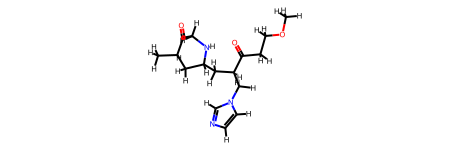

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
mol = Chem.MolFromSmiles("COCCC(=O)[C@H](CC1NCC(=O)C(C)C1)Cn1cncc1")
mol = Chem.AddHs(mol, addCoords=True)
AllChem.EmbedMolecule(mol)
mol

In [3]:
docker.dock(mol, "output/prepared_protein.pdb")

[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol as 3D.
[15:18:45] Warning: molecule is tagged as 2D, but at least one Z coordinate is not zero. Marking the mol

FileNotFoundError: [Errno 2] No such file or directory: '/home/arazthexd/projects/002_sqm/tmp/gnina_flex_out.pdb'